In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = load_breast_cancer()
X = data.data
y = data.target

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
class KMeans:
    def __init__(self, n_clusters, max_iter=1000, tolerance=0.001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tolerance = tolerance
        
    def fit(self, X):
        np.random.seed(42)
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            self.labels = self.assign_clusters(X) #Label each data point with the nearest centroid
            
            new_centroids = self.compute_centroids(X) #Calculate the new centroids based on the mean of data points in each cluster.
            
            if np.all(np.abs(self.centroids - new_centroids) < self.tolerance): #If cluster movement is less than tolerance, kill the algo
                break
            self.centroids = new_centroids #Centroids are updated to new centroids
            
    def initialize_centroids(self, X):
        random_idxs = np.random.permutation(X.shape[0])[:self.n_clusters] #Randomly select n_clusters data points as the initial centroids.
        return X[random_idxs, :]
        
    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2) #Euclidean Distance
        return np.argmin(distances, axis=1) #Return Cluster who has the lowest euclidean distance
    
    def compute_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1])) #Initialize with zeros (clusters, features)
        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i] # Select data points assigned to current cluster
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0) #Compute mean (which becomes new centroid)
            else:
                centroids[i] = X[np.random.choice(range(X.shape[0]))] #If cluster is empty, initialize random point
        return centroids

In [64]:
k_means = KMeans(n_clusters=3)
k_means.fit(X_scaled)
labels = k_means.labels

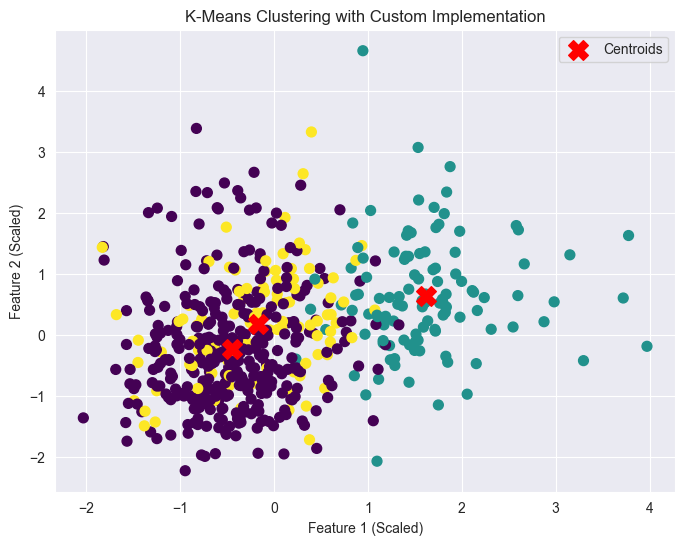

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(k_means.centroids[:, 0], k_means.centroids[:, 1], color='red', marker='X', s=200, label="Centroids")
plt.title("K-Means Clustering with Custom Implementation")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()

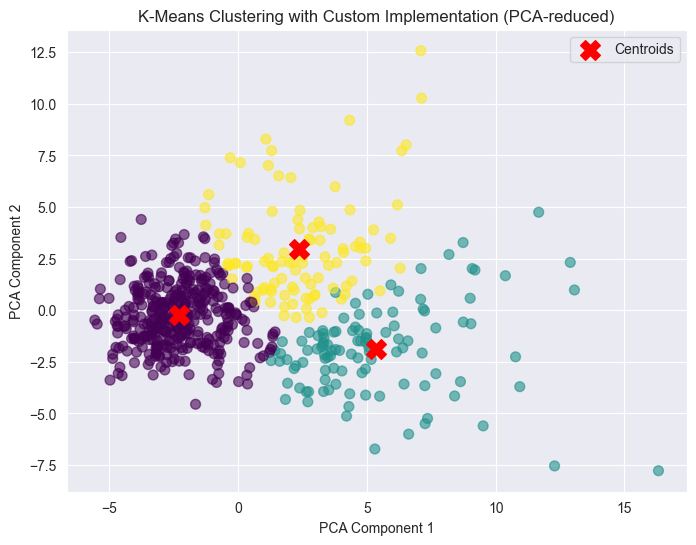

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(k_means.centroids)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='red', marker='X', s=200, label="Centroids")
plt.title("K-Means Clustering with Custom Implementation (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()